### 1. Aprendizaje Automático

##### 1.1. Preprocesamiento de datos

##### 1.1.1. 
A la hora de preparar los datos antes de ser entrenados existen tres acciones básicas a realizar, explique en que consiste cada una de las siguientes y como se implementarían en Python: Mean subtraction, Normalization, Scaling.

Aplicar estas tres funciones sobre un dataset a elegir de scikit-learn

#### a) Mean Substraction o Mean Removal 
#### [Teoría]: 
 
La intención de quitar la media al momento de preparar diferentes datos para ser utilizados a futuro, es lograr de algún modo una estandarización de dichos datos para que puedan ser comparados entre sí.

Por ejemplo:

Si pensamos en la medición de temperaturas, los valores numéricos de los promedios de temperatura dependen de que escala se utilice (Fahrenheit, Celsius o Kelvin). La elección de un punto central (es decir, un cero) para nuestras mediciones, estará ligada a la escala usada.

Pero, si eliminamos la media, quitamos la influencia de dicha elección. Aún así, la unidad de medida sigue estando visible de algún modo en los datos, puesto que la nocion de "1 grado de temperatura" es diferente en las diferentes escalas. La division por σ remueve las unidades y obtenemos una cantidad sin unidad ("z-score") que es independiente de la escala de temperatura utilizada. (Teniendo en cuenta que la escala es linear y que el sentido de "más caliente" representa una "mayor temperatura").

A gran escala, la idea es permitir que diferentes conjuntos de datos sean comparables.

#### [Aplicación]:

Datos: 
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]]
...


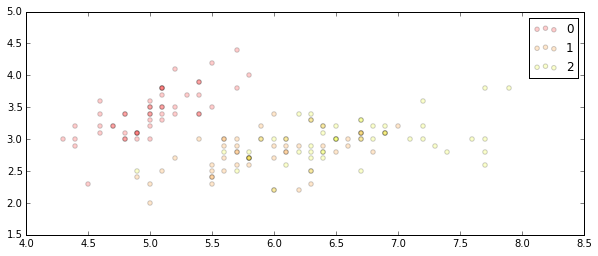

In [5]:
from sklearn import preprocessing
from sklearn import datasets
import numpy as np
% matplotlib inline
import matplotlib.pyplot as plt

def graficar(x, y):
    # get the product class 
    product_class = np.unique(Y)
    colors = plt.get_cmap("hsv")
    plt.figure(figsize=(10, 4))
    for i, p in enumerate(product_class):
        mask = (y == p)
        plt.scatter(x[mask, 0], x[mask, 1], 
                    c=colors(1. * i / 11), label=p, alpha=0.2)
    plt.legend(loc="best")

iris = datasets.load_iris()
X = iris.data
Y = iris.target
print "Datos: \n", X[:10]
print "..."
graficar(X, Y)

Mean: [ 5.84333333  3.054       3.75866667  1.19866667] 
Std: [ 0.82530129  0.43214658  1.75852918  0.76061262]
Data w/ mean removal applied (total: 150):
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]
 [-0.53717756  1.95766909 -1.17067529 -1.05003079]
 [-1.50652052  0.80065426 -1.3412724  -1.18150376]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]
 [-1.74885626 -0.35636057 -1.3412724  -1.31297673]
 [-1.14301691  0.10644536 -1.2844067  -1.4444497 ]]
...


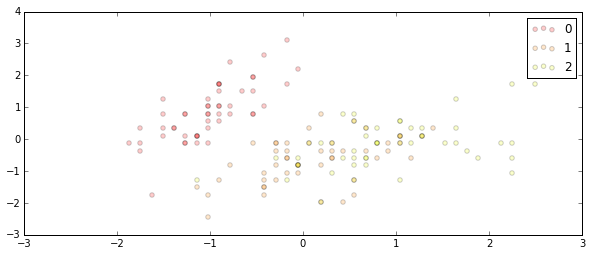

In [2]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
mean_ = scaler.mean_
std_ = scaler.std_
print "Mean: %s \nStd: %s" % (mean_, std_)
print "Data w/ mean removal applied (total: %d):\n %s" % (len(X_scaled), X_scaled[:10])
print "..."
graficar(X_scaled, Y)

#### b) Normalización:
#### [Teoría]:

En estadística y aplicaciones de estadística, la normalización puede tener varios significados. En los casos más simples, la normalización se refiera a el ajuste de valores medidos en diferentes escalas a una escala común, a menudo antes de trabajar con promedios.

En casos más complicados, la normalización puede referirse a ajustes más sofisticados donde la intención es "alinear" las diferentes distribuciones de probabilidad que poseen los datos.

Un enfoque distinto es la normalización cuantil, donde los cuantiles de diferentes mediciones, son llevados a una forma común.

En otro uso estadístico, el proceso de normalización se refiere a la creación de versiones escaladas y cambiadas de las estadísticas, donde la intención es que dichos valores normalizados permitan su comparación con otros valores (también normalizados), pertenecientes a otros conjuntos de datos, de modo que pueda ser posible eliminar ciertas influencias externas (por ejemplo: unidades de medida).

#### c) Scaling:
#### [Teoría]:


Típicamente, en lo referente a estadística, la acción de escalar datos tiene que ver con transformar linealmente a los valores para poder trabajar con ellos. Por ejemplo: llevando todos los valores del conjunto de datos a una escala propiamente dicha, cuyos valores esten comprendidos entre 0 y 1, o entre -1 y 1.

La normalización, en cambio, puede involucrar tanto el hecho de aplicar una transformación para que los datos estén distribuidos normalmente, o bien poner los valores en una escala común.

#### 1.1.2. Cuando trabajamos con datos de muchas dimensiones, suele ser necesario reducir esta dimensionalidad sin perder mucha información de nuestros datos, una opción para realizar esto es aplicar PCA (principal component analysis) sobre los mismos.

#### a) Aplique PCA sobre el dataset otto(ver ipynb con links a dataset)

In [3]:
from pandas import read_csv
from sklearn.decomposition import PCA


# Test dataset
test = read_csv('data/test.csv')

# Train dataset
train = read_csv('data/train.csv')
X = train.ix[:,1:-1].values
#print X
y = train.ix[:, -1]
#print y

types = np.sort(np.unique(y))
new_values = dict(zip(types, range(types.shape[0])))
y = (y.map(new_values).astype(np.int32)).values
print y
target_names = np.unique(y)

# con 18 componentes tenemos 0.6979% explicada la variablidad
# con 27 componentes tenemos 0.8006% explicada la variablidad
def get_n_comp_expl_var(variance):
    for i in range(100):
        pca = PCA(n_components=i)
        pca.fit(X)
        suma = pca.explained_variance_ratio_.sum()
        if suma >= variance:
            return i, pca

[0 0 0 ..., 8 8 8]


#### b) Cuantos componentes se deben usar para explicar la variabilidad del 70 % y 80 % de los datos.

In [4]:
variances = [0.7, 0.8]
pcas = []
for v in variances:
    res = get_n_comp_expl_var(v)
    n_comp = res[0]
    pca = res[1]
    pcas.append(pca)
    print "Para explicar el %d %% de variabilidad de los datos,\
            son necesarios %d componentes" % (v*100, n_comp)

Para explicar el 70 % de variabilidad de los datos,            son necesarios 19 componentes
Para explicar el 80 % de variabilidad de los datos,            son necesarios 27 componentes


#### c) Grafique los primeros dos PCAs

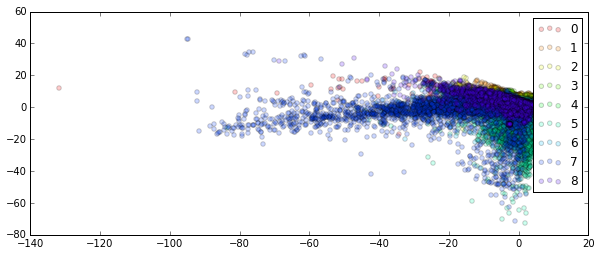

In [7]:
def graficar_pca(x_transformed, y, target_names):
    colors = plt.get_cmap("hsv")
    plt.clf()
    plt.figure(figsize=(10, 4))
    for i, p in enumerate(target_names):
        mask = (y == p)
        plt.scatter(x_transformed[mask, 0], x_transformed[mask, 1], 
                c=colors(1. * i / 11), label=p, alpha=0.2)
    plt.legend(loc="best")

for pca in pcas:
    x_transformed = pca.fit_transform(X)
    graficar_pca(x_transformed, y, target_names)

#### 1.2. Introducción a aprendizaje automático
Dentro del aprendizaje automático, contamos con varias áreas de aplicación, entre ellas podemos encontrar: clasificación, regresiones, clustering y reducción de dimensiones. 

Explique que problemas resuelven los métodos que se encuentran dentro de estas áreas, explique un método dentro de cada una de ellas y de una posible aplicación.

-------------------------------------------------------------------------------------------

Los métodos que se encuentran dentro de esas áreas resuelven los siguientes problemas:
- Clasificación: Identificar a cuál categoría pertenece un objeto.
- Regresión: Predecir un valor contínuo asociado a un objeto.
- Clustering: Agrupación automática de objetos similares en conjuntos.
- Reducción de dimensionalidad: Reducir el número de variables al azar a considerar.

#### Métodos para clasificación y regresión:
- Modelos lineales generalizados (regresión: bayesiana, logística, polinomial, entre otros).
- Modelos lineales y cuadráticos para análisis discriminante.
- Máquinas de vectores de soporte. (clasificación, regresión, formulación matemática, estimación de densidad, complejidad, entre otros).
- Stochastic Gradient Descent (Clasificación, regresión, complejidad, entre otros).
- Vecinos más cercanos (Clasificación, regresión, entre otros).
- Procesos gausseanos (Formulacion matemática, modelos de correlación, modelos de regresión).
- Descomposicion cruzada
- Naive Bayes (Gauss Naive Bayes, Multinomial Naive Bayes, Bernoulli Naive Bayes, entre otros).
- Arboles de decisión (Clasificación, regresión, problemas con múltiples resultados, complejidad, entre otros).

Aplicación: 
- Clasificacion: El uso de SVM's para determinar a que número del 0 al 9, corresponde un digito manuscrito y proporcinado como entrada.
- Regresión: Predicción del valor de una casa en función de su superficie útil, número de habitaciones, cuartos de baños, etc

#### Métodos para clustering:
- K-means
- Affinity propagation
- Mean-shift
- Spectral clustering
- Agglomerative clustering
- Entre otros

Aplicación: 
Las técnicas de agrupamiento encuentran aplicación en diversos ámbitos.
- En biología para clasificar animales y plantas.
- En medicina para identificar enfermedades.
- En marketing para identificar personas con hábitos de compras similares.
- En teoría de la señal pueden servir para eliminar ruidos.
- En biometría para identificación del locutor o de caras.

#### Métodos para reducción de dimensionalidad:
- Exact PCA and probabilistic interpretation
- Incremental PCA
- Approximate PCA
- Kernel PCA
- SparcePCA
- MiniBatchSparcePCA
- Dictionary Learning
- Factor Analysis
- Independent Component Analysis (ICA)
- Entre otros

Aplicación:

Una análisis de 11 indicadores socieconómicos de 96 países, reveló que los resultados podían explicarse en alto grado a partir de sólo dos componentes principales, el primero de ellos tenía que ver con el nivel de PIB total del país y el segundo con el índice de ruralidad.

-------------------------------------------------------------------------------------------

¿La cantidad de datos disponibles para entrenamiento pueden condicionar la elección de algún método sobre otro? ¿Y el tipo de dato? 

Primero que nada, cabe aclarar que la elección del método depende principalmente del problema. Si se dispone de un conjunto de datos significativo y si se trata de un problema que se pueda resolver con aprendizaje supervisado o bien con aprendizaje no supervisado. 

Algunos casos particulares: 

**Mandarin Voice Conversion Using Tone Codebook Mapping:** 

Utiliza una versión adaptada de un algoritmo de clustering llamada Linde–Buzo–Gray o LBG, similar a k-means, pero específico para trabajar con señales de audio (voz) y  debido a su efectividad para realizar clustering sobre los vectores de tono (pitch) de dichas señales y aprender los codebooks (conjunto de muestras de tonos) de los distintos tonos del dataset.

Este algoritmo crea una cantidad de clusters igual a una potencia de 2 para poder trabajar. A su vez, se sabe que en cuanto a performance el algoritmo se comporta de manera similar al algoritmo de Lloyd, en términos de precision y velocidad en lo que se refiere al clustering de features en problemas de reconocimiento del habla, siendo que el algoritmo de Lloyd funciona a buena velocidad con grandes conjuntos de datos y también presenta una ventaja en cuanto a tiempo de procesamiento y en términos de error cuadrático medio comparado con otros algoritmos [1].

[1]: http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2423442/

**Location of Tropical Cyclone Center with Intelligent Image Processing Technique**

La idea básica detrás de este experimento, es encontrar los centros de los ciclones tropicales basados en la utilización de técnicas para procesamiento inteligente de imagen además de otras caracteristicas como temperatura y trayectoria de los mismos.

Dentro de las técnicas utilizadas, se mencionan: *Noise Reduction* e *Image Segmentation* para disminuir el ruido de las imagenes satelitales y acotar la imagen a procesar al área adecuada que contenga los datos y de ese modo reducir la cantidad de datos a procesar, así tambien como *Rotation Center Method* para simular el comportamiento rotativo de los ciclones tropicales.

**Research and Application of Data Mining in Power Plant Process Control and Optimization **

Como su nombre en inglés lo indica, utiliza técnicas de *Data Mining* para el control y optimizacion de las operaciones dentro de una planta de energía debido al volúmen de datos que estas reciben en tiempo real y en función de los factores más relevantes para dichas operaciones.

Se puede extraer mucho conocimiento existente en los datos historicos pero es dificil de encontrar y resumirlos del modo tradicional debido al gran volúmen y al fuerte acoplamiento que los datos tienen en el proceso de la electricidad industrial

Las técnicas de data mining proveen un modo efectivo y moderno de resolver estas dificultades. Puede adquirir conocimiento útil y e inferir reglas o tendencias hallados en los datos almacenados y proveer un mejor soporte para la toma de decisiones y una forma de optimización de los procesos industriales, por lo que resulta importante encontrar dicha informacion en los datos históricos para mejorar los sistemas de energía.

Dentro de las técnicas utilizadas, se menciona: *Fuzzy Association Rule Mining* que sirve para descubrir importantes relaciones entre diferentes items. Aunque se utiliza una versión mejorada del algoritmo para encontrar los valores necesarios para optimizar los procesos de la planta de energía.

A su vez, La determinación de los valores de optimización basados en minería de datos tiene varias virtudes por sobre los métodos tradicionales: 

* El valor puede ser regulado dinámicamente de acuerdo a las diferentes necesidades tales como el bajo consumo de carbón o bajo nivel de emisiones de contaminación. 

* El valor que se determina a partir de datos históricos es acorde a la realidad y razonable en la práctica.

* El valor de optimización se presenta en un intervalo, por lo que el operador tiene más opciones la hora de optimizar el proceso industrial.


En el inciso [1.3.1] del presente documento, pueden apreciarse entre otros factores, la escalabilidad en cuanto a 3 métodos de clustering: K-Means, Mean-shift y Gaussian mixtures. Es decir, cómo éstos se comportan bajo una alta exigencia en cuanto a cantidad de clusters presentes y a cantidad de muestras disponibles.

[1.3.1]:http://localhost:8888/notebooks/tp5.ipynb#1.3.-Clustering

**Conclusión:** 

Puede asegurarse que tanto el tipo de datos, como la cantidad de los mismos así tambien como la naturaleza del problema condicionan la elección de los diferentes métodos.





-------------------------------------------------------------------------------------------
En la implementación, ¿Cuál es el pipe utilizado para analizar datos con una SVM? Explique parámetros y función de cada paso.

Un pipeline sencillo puede ser el siguiente:

```python
from sklearn.pipline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

pipe = make_pipeline(StandardScaler(), SVC())
pipe.fit(X_train, y_train)
pipe.predict(X_test)
```
En donde, por medio de la utilizacion de una funcion particular "make_pipeline()", se le indica con que método debe estandarizar los valores y con que algoritmo se va a trabajar, en este caso un "SVC()" (Support Vector Classifier), esto es, una SVM específica para problemas de clasificación.
Luego se le indica que entrene con un subconjunto de los datos originales y que prediga los resultados de un subconjunto de datos de prueba.

A su vez, hay pasos anteriores a esta utilización, como por ejemplo la división del conjunto de valores que se puede realizar como sigue:

```python
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
```
En donde la función "train_test_split()", recibe como parámetros los datos originales (Tanto los valores originales como las clases a las que estos corresponden), el tamaño en porcentaje del conjunto de prueba resultante y el valor random_state que sirve de semilla para generar un muestreo al azar que le indica al algoritmo como hacer la división

#### 1.3. Clustering

#### 1. Describa de los siguientes métodos de clustering cual es la métrica utilizada, sus casos de uso y su escalabilidad en la implementación.
#### a) K-Means
> **Métrica:** Distancia entre puntos.

> **Casos de uso:** Propósito general, donde sean requeridos pocos clusters para resolver problemas. Típicamente encontrándose de a pares y en superficies planas.

> **Escalabilidad:** Soporta un alto número de muestras y un nivel medio de clusters (MiniBatchKmeans)

>MiniBatchKmeans:  es una variante de KMeans. Ésta utiliza mini-batches para reducir el tiempo de cómputo, mientras intenta optimizar la misma funcion objetivo. 

>Los mini-batches son subsets de datos de entrada, muestreados al azar en cada iteracion de entrenamiento. Estos mini-batches, reducen la cantidad de computación requerida para converger a una solucion local. 

> En contraste con otros algoritmos que reducen el tiempo de convergencia de k-means, éste produce resultados que en lo general son ligeramente peores que el algoritmo estándar.

#### b) Mean-Shift
> **Métrica:** Distancia entre puntos.

> **Casos de uso:** Se utilizan cuando es necesaria una gran cantidad de clusters para resolver los problemas (cantidades impares y geometrías no planas).

> **Escalabilidad:** Se ve limitado en cuanto a la cantidad de muestras.

#### c) Gaussian mixtures
> **Métrica:** Distancia de Mahalanobis, Distancia entre centros.

> **Casos de uso:** Geometrías planas, bueno para estimaciones de densidad.

> **Escalabilidad:** No escala al tener en cuenta el numero de muestras y el numero de clusters.

#### 2. Llevar una imagen cualquiera (recibida por linea de comando) a 80 colores con el método de clustering K-Means e imprima los porcentajes de estos colores en la imagen resultante. Qué aplicación le daría a este algoritmo?

In [14]:
% matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
from prettytable import PrettyTable

In [15]:
img = plt.imread("data/img.jpg")
original_colors = np.unique(img)
#plt.imshow(img)
n_colors = 80

In [16]:
img = img.astype(dtype=np.float64)/255
print img #Se ven los valores RGB llevados a la escala 0..1

[[[ 0.98823529  0.76470588  0.21176471]
  [ 0.98823529  0.76470588  0.21176471]
  [ 0.98823529  0.76470588  0.21176471]
  ..., 
  [ 1.          0.85882353  0.42745098]
  [ 1.          0.85882353  0.42745098]
  [ 1.          0.85882353  0.42745098]]

 [[ 0.98823529  0.76470588  0.21176471]
  [ 0.98823529  0.76470588  0.21176471]
  [ 0.99215686  0.76862745  0.21568627]
  ..., 
  [ 1.          0.85882353  0.42745098]
  [ 1.          0.85882353  0.42745098]
  [ 1.          0.85882353  0.42745098]]

 [[ 0.99215686  0.76862745  0.21568627]
  [ 0.99215686  0.76862745  0.21568627]
  [ 0.99215686  0.76862745  0.21568627]
  ..., 
  [ 0.99607843  0.8627451   0.43137255]
  [ 0.99607843  0.8627451   0.43137255]
  [ 0.99607843  0.8627451   0.43137255]]

 ..., 
 [[ 0.02352941  0.11764706  0.13333333]
  [ 0.01960784  0.11372549  0.12941176]
  [ 0.01960784  0.10196078  0.12156863]
  ..., 
  [ 0.18039216  0.29803922  0.29019608]
  [ 0.14509804  0.27058824  0.25882353]
  [ 0.16078431  0.28627451  0.26666

In [17]:
w, h, d = original_shape = tuple(img.shape)
assert d == 3
image_array = np.reshape(img, (w * h, d))
print image_array.shape
print image_array

(307200, 3)
[[ 0.98823529  0.76470588  0.21176471]
 [ 0.98823529  0.76470588  0.21176471]
 [ 0.98823529  0.76470588  0.21176471]
 ..., 
 [ 0.17254902  0.29803922  0.27843137]
 [ 0.21176471  0.3372549   0.31764706]
 [ 0.17647059  0.31372549  0.28627451]]


In [20]:
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

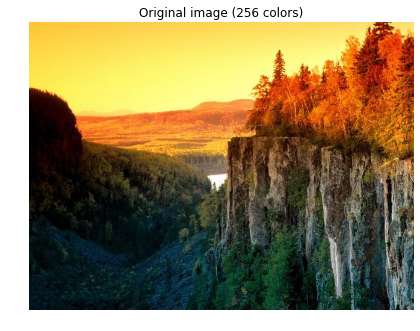

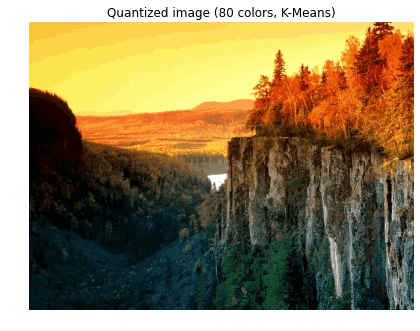

In [21]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

def print_img(image, title, figure):
    plt.figure(figure)
    plt.clf()
    ax = plt.axes([0, 0, 1, 1])
    plt.axis('off')
    plt.title(title)
    plt.imshow(image)
    
title1 = 'Original image ({} colors)'.format(original_colors.shape[0])
title2 = 'Quantized image ({} colors, K-Means)'.format(n_colors)

print_img(img, title1, 1)
print_img(recreate_image(kmeans.cluster_centers_, labels, w, h), title2, 2)

In [14]:
totales = []
for l in np.unique(labels):
    totales.append(np.extract(labels==l, labels).shape[0])

porcentajes = [((t * 100.00) / len(labels)) for t in totales]

pt = PrettyTable()
valores = ["%.3f %%" % (val) for val in porcentajes]

pt.add_column('Cluster', range(len(valores)))
pt.add_column('Porcentajes', valores)

print pt

+---------+-------------+
| Cluster | Porcentajes |
+---------+-------------+
|    0    |   2.535 %   |
|    1    |   1.711 %   |
|    2    |   0.770 %   |
|    3    |   0.511 %   |
|    4    |   0.462 %   |
|    5    |   1.344 %   |
|    6    |   0.582 %   |
|    7    |   1.180 %   |
|    8    |   0.861 %   |
|    9    |   2.146 %   |
|    10   |   1.008 %   |
|    11   |   1.044 %   |
|    12   |   0.825 %   |
|    13   |   2.707 %   |
|    14   |   2.675 %   |
|    15   |   1.329 %   |
|    16   |   1.796 %   |
|    17   |   1.034 %   |
|    18   |   0.128 %   |
|    19   |   1.007 %   |
|    20   |   0.536 %   |
|    21   |   1.606 %   |
|    22   |   0.418 %   |
|    23   |   0.420 %   |
|    24   |   1.871 %   |
|    25   |   0.251 %   |
|    26   |   1.480 %   |
|    27   |   1.653 %   |
|    28   |   1.096 %   |
|    29   |   1.209 %   |
|    30   |   0.799 %   |
|    31   |   0.132 %   |
|    32   |   3.723 %   |
|    33   |   0.380 %   |
|    34   |   2.111 %   |
|    35   | 

#### Aplicación

La aplicación que se le puede dar a los algoritmos de clustering, se encuentra detallada en el inciso **1.2** de este documento, pero en síntesis, se utilizan para clasificar o agrupar datos cuando se desconocen de antemano las categorías o grupos a las que estos pertenecen. Debido a esta característica, se dice que son no supervisados.

Intentan responder como es que ciertos Objetos (casos) pertenecen o “caen” naturalmente en cierto número de clases o grupos, de tal manera que estos objetos comparten ciertas características.
Pero esta definición asume que los objetos pueden dividirse, razonablemente, en grupos que contienen objetos similares. Si tal división existe, ésta puede estar oculta y debe ser descubierta. 
Éste es el objetivo principal de las técnicas de clustering. 



#### 3. Aplicar el método de Mean-Shift sobre el dataset IRIS

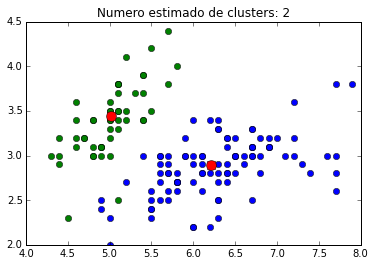

In [10]:
from sklearn.cluster import MeanShift

#cargamos los datos de iris
iris = datasets.load_iris()
X = iris.data

ms = MeanShift()
ms.fit(X)
centers = ms.cluster_centers_ #luego de entrenar, estima los centros
mean_shift_labels = ms.labels_ # luego los labels para cada punto
labels_unique = np.unique(mean_shift_labels) #nos dice cuantos labels hay
n_clusters_ = len(labels_unique) #en base a ello, estima la cantidad de clusters que fueron necesarios

# mostramos los puntos y sus clusters (centros incluidos)
colors = ['b','g','r','c','m','y','k']*3
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + 'o')
    plt.plot(cluster_center[0], cluster_center[1], u'o', markerfacecolor='r',
              markersize=10)


plt.title('Numero estimado de clusters: %d' % n_clusters_)
plt.show()

#### 1.4. Clasificación

**1. Comente dos kernels posibles para una SVM, cuales son sus diferencias, y que tan importante es la elección de estos a la hora de resolver un problema. **

** 2. Implemente sobre un mismo dataset a elección una SVM con dos kernels diferentes y grafíquelos. Qué diferencias encontró? Para que tipo de distribución es útil un kernel lineal?**

**3. Clasifique por calidad a los vinos encontrados en el archivo winequality red.csv, cuales son los valores promedio para obtener un vino de calidad 6?. Grafique la función de decisión obtenida. Qué clasificador utilizó? Realice el mismo análisis con otro método y compare. **

#### 1.5. Regresión

** 1. Liberty Mutual Group es una aseguradora mundial que desea predecir el score Hazard para saber si es rentable asegurar a una propiedad o no, este puntaje es un valor continuo que se saca de ciertas características dadas de la propiedad (ver archivo csv). ** 

**Realice una red neuronal para predecir automáticamente la puntuación de riesgo.**

**2. Implemente una solución con SVR (Support Vector Regression) y compare los resultados.**

#### 1.6. Cuantificación de la calidad de las predicciones

Dependiendo el tipo de algoritmo utilizado existen diferentes formas de probar que tan confiable o que tan buen predictor de nuestros datos es el método usado.

A continuación defina los siguientes scores y apliquelos de forma correspondiente a los métodos aplicados en los ejercicios de aprendizaje automático. 

* Regresión: 
    > *Mean Squared Error:* En estadística, el error cuadrático medio (ECM) de un estimador mide el promedio de los errores al cuadrado, es decir, la diferencia entre el estimador y lo que se estima. La diferencia se produce debido a la aleatoriedad o porque el estimador no tiene en cuenta la información que podría producir una estimación más precisa.
    
    > *r²:* En estadística, el coeficiente de determinación, es un estadístico usado en el contexto de un modelo estadístico cuyo principal propósito es predecir futuros resultados o probar una hipótesis. Determina la calidad del modelo para replicar los resultados, y la proporción de variación de los resultados que puede explicarse por el modelo.
    
* Clasificación: 
    > *F1 score*: El Valor-F (denominada también F-score o medida-F) en estadística es la medida de precisión que tiene un test. Se emplea en la determinación de un valor único ponderado de la precisión y la exhaustividad.
    
    > *Log loss*: Es una función que determina la pérdida logística (Seguir buscando....)
    
    > *Accuracy*: Es el grado de "cercanía" de las mediciones de una cantidad al verdadero valor de esa misma cantidad.
    
    > *Precision*: Es el grado en el que para repetidas mediciones de una cantidad bajo las mismas condiciones, se muestran los mismos resultados.
    
    > *Compute area under the curve*: La curva ROC se puede usar para generar estadísticos que resumen el rendimiento (o la efectividad, en su más amplio sentido) del clasificador.
    
    > El indicador más utilizado en muchos contextos es el área bajo la curva ROC o AUC. Este índice se puede interpretar como la probabilidad de que un clasificador ordenará o puntuará una instancia positiva elegida aleatoriamente más alta que una negativa.
    
* Clustering: 
    > *Rand index adjusted for chance*: El índice Rand o medida Rand (William M. Rand), es una medida de similitud entre dos clusters de datos. Una forma del índice Rand puede decirse ajustada por la probabilidad de agrupar elementos, en cuyo caso se denomina índice Rand ajustado.

In [12]:
from sklearn.metrics import adjusted_rand_score




#Clustering score
print "> MeanShift Clustering On Iris Dataset <"
print "Rand index adjusted for a chance: " , adjusted_rand_score(iris.target, mean_shift_labels)
print " "
print "> Kmeans Clustering On Image Processing<"
print "Rand index adjusted for a chance: ", adjusted_rand_score(,kmeans_labels_pred) 

> MeanShift Clustering On Iris Dataset <
Rand index adjusted for a chance:  0.558371443754
